In [2]:
import os
import numpy as np 
import PIL
import io


In [3]:
path = "C:/Users/pooch/OneDrive/Desktop/deeplearning/dataset/archive/Animal Image Dataset"

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training flow
train_datagen = ImageDataGenerator(rescale = 1.0 /255 ,
                                  validation_split= 0.2)




In [5]:
train_generator = train_datagen.flow_from_directory(
               path,
               target_size =(256,256),
               batch_size = 110,
               class_mode = 'categorical',
               subset = 'training' )


Found 13746 images belonging to 12 classes.


In [6]:
validation_datagen = ImageDataGenerator(rescale = 1.0 /255,
                                       validation_split= 0.2)

In [7]:
# Validation flow

validation_generator = validation_datagen.flow_from_directory(
               path,
               target_size =(256,256),
               batch_size = 60,
               class_mode = 'categorical',
               subset = 'validation' )

Found 3432 images belonging to 12 classes.


In [8]:

# Create an embedding layer.
embedding_dim = 16
embedding = tf.keras.layers.Embedding(embedding_dim,output_dim = 3)

model = tf.keras.models.Sequential([
  #embedding,                                  
  tf.keras.layers.Conv2D(16 ,(3,3) , activation = 'relu' , input_shape =(256 ,256 , 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32 ,(3,3) , activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64 ,(3,3) , activation = 'relu' ),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128 ,(3,3) , activation = 'relu' ),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256 ,(3,3) , activation = 'relu' ),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Conv2D(512 ,(3,3) , activation = 'relu' ),
  tf.keras.layers.MaxPooling2D(2,2),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
  tf.keras.layers.Dense(12, activation='softmax') ])

# Displaying Total summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

In [9]:
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'categorical_crossentropy' , optimizer= Adam(learning_rate=0.001) , metrics=['acc'])

In [10]:

history = model.fit(
    train_generator,
    steps_per_epoch = 125,
    epochs = 15,
    validation_data = validation_generator)

Epoch 1/15
125/125 [==============================] - 157s 1s/step - loss: 2.3079 - acc: 0.1732 - val_loss: 2.2551 - val_acc: 0.2156
Epoch 2/15
125/125 [==============================] - 126s 1s/step - loss: 2.0430 - acc: 0.2750 - val_loss: 2.0161 - val_acc: 0.2905
Epoch 3/15
125/125 [==============================] - 126s 1s/step - loss: 1.7450 - acc: 0.3907 - val_loss: 1.8203 - val_acc: 0.3846
Epoch 4/15
125/125 [==============================] - 125s 1s/step - loss: 1.5111 - acc: 0.4782 - val_loss: 1.6020 - val_acc: 0.4586
Epoch 5/15
125/125 [==============================] - 120s 967ms/step - loss: 1.3405 - acc: 0.5394 - val_loss: 1.4872 - val_acc: 0.4988
Epoch 6/15
125/125 [==============================] - 120s 957ms/step - loss: 1.1814 - acc: 0.5962 - val_loss: 1.3917 - val_acc: 0.5353
Epoch 7/15
125/125 [==============================] - 121s 970ms/step - loss: 1.0554 - acc: 0.6419 - val_loss: 1.3494 - val_acc: 0.5606
Epoch 8/15
125/125 [==============================] - 117s 9

Text(0.5, 1.0, 'Training and validation loss')

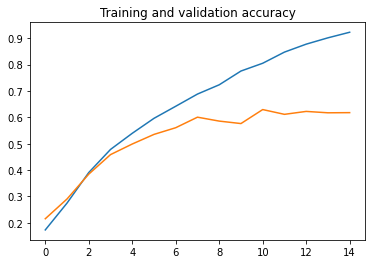

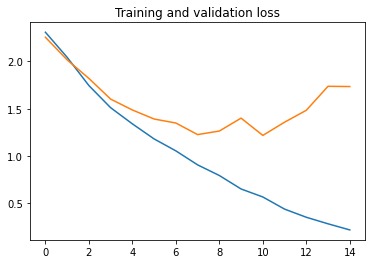

In [11]:
import matplotlib.pyplot as plt

acc = history.history[ 'acc' ]
val_acc = history.history[ 'val_acc' ]
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(acc)) # Get number of epochs

plt.plot ( epochs, acc )
plt.plot ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot ( epochs, loss )
plt.plot ( epochs, val_loss )
plt.title ('Training and validation loss' )


In [12]:
import tensorflow as tf
model_reduced = tf.keras.Sequential()

for layer in model.layers[:-2]:
  model_reduced.add(layer)

In [13]:
import cv2
import os
import argparse
import pickle
from keras.preprocessing import image
import numpy as np
from numpy import asarray
from keras.preprocessing.image import img_to_array

data_path = 'C:/Users/pooch/OneDrive/Desktop/deeplearning/dataset/archive/Animal Image Dataset'
data_dir_list = os.listdir(data_path)
image_features_list=[]
image_name_feature =[]
def get_image_features(image_file_name):
  
  im=image.load_img(image_file_name,target_size=(256,256))
  im=image.img_to_array(im)
  im=np.expand_dims(im,axis=0)
  image_feature=model_reduced.predict(im)[0]
  image_features_arr=np.asarray(image_feature)

  return image_features_arr

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Extracting Features of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        image_path=data_path + '/'+ dataset + '/'+ img
        image_features=get_image_features(image_path)
        
        image_features_list.append(image_features)
        image_name_add=[img,image_features]
        image_name_feature.append(image_name_add)
image_features_arr=np.asarray(image_features_list)
image_features_arr = np.rollaxis(image_features_arr,1,0)
image_features_arr=image_features_arr.T
#print(image_features_arr.shape)
np.savetxt('C:/Users/pooch/OneDrive/Desktop/deeplearning/dataset/archive/Animal Image Dataset/feature_vectors_class_samples.txt',image_features_arr)

pickle.dump(image_features_arr, open('C:/Users/pooch/OneDrive/Desktop/deeplearning/dataset/archive/Animal Image Dataset/feature_vectors_class_samples.pkl', 'wb'))

Extracting Features of dataset-butterfly

Extracting Features of dataset-cats

Extracting Features of dataset-cow

Extracting Features of dataset-dogs

Extracting Features of dataset-elephant

Extracting Features of dataset-hen

Extracting Features of dataset-horse

Extracting Features of dataset-monkey

Extracting Features of dataset-panda

Extracting Features of dataset-sheep

Extracting Features of dataset-spider

Extracting Features of dataset-squirrel



In [14]:

import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
# Load the TensorBoard notebook extension
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
 
%load_ext tensorboard
import tensorflow_datasets as tfds
from tensorboard.plugins import projector
 

tf.compat.v1.disable_eager_execution()
 
LOG_DIR = 'C:/Users/pooch/OneDrive/Desktop/deeplearning/dataset/archive/Animal Image Dataset'
#metadata = os.path.join(LOG_DIR, 'metadata2.tsv')
 
#%%
data_dir_list = 'C:/Users/pooch/OneDrive/Desktop/deeplearning/dataset/archive/Animal Image Dataset'
 
img_data=[]
for dataset in os.listdir(data_dir_list):
    img_list=os.listdir(data_dir_list+'/'+ dataset)
   # print ('images list',img_list)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_dir_list+'/'+ dataset+'/'+ img )
        input_img_resize=cv2.resize(input_img,(224,224))
        img_data.append(input_img_resize)
    
                
img_data = np.array(img_data)
 
#%%
 
feature_vectors = np.loadtxt(os.path.join(LOG_DIR,'feature_vectors_class_samples.txt'))
print ("feature_vectors_shape:",feature_vectors.shape)
print ("num of images:",feature_vectors.shape[0])
print ("size of individual feature vector:",feature_vectors.shape[1])
 
num_of_samples=feature_vectors.shape[0]
num_of_samples_each_class = 100
 
features = tf.Variable(feature_vectors, name='features')
 
y = np.ones((num_of_samples,),dtype='int64')
 
y[0:99]=0,
y[100:199]=1,
y[200:299]=2,
y[300:399]=3,
y[400:499]=4,
y[500:599]=5,
y[600:699]=6,
y[700:799]=7,
y[800:899]=8,
y[900:999]=9,
y[1000:1099]=10,
y[1100:1199]=11

 
names = ['butterfly','cats','cow','dogs' ,'elephant','hen','horse','monkey' ,'panda' ,'sheep' ,'spider' ,'squirrel']
 

metadata_file = open(os.path.join(LOG_DIR, 'metadata_2_classes.tsv'), 'w')
metadata_file.write('Class\tName\n')
k=100 # num of samples in each class
j=0
#for i in range(210):
#    metadata_file.write('%06d\t%s\n' % (i, names[y[i]]))
for i in range(num_of_samples):
    c = names[y[i]]
    if i%k==0:
        j=j+1
    metadata_file.write('{}\t{}\n'.format(j,c))
    #metadata_file.write('%06d\t%s\n' % (j, c))
metadata_file.close()
       
    
# Taken from: https://github.com/tensorflow/tensorflow/issues/6322
def images_to_sprite(data):
    if len(data.shape) == 3:
        data = np.tile(data[...,np.newaxis], (1,1,1,3))
    data = data.astype(np.float32)
    min = np.min(data.reshape((data.shape[0], -1)), axis=1)
    data = (data.transpose(1,2,3,0) - min).transpose(3,0,1,2)
    max = np.max(data.reshape((data.shape[0], -1)), axis=1)
    data = (data.transpose(1,2,3,0) / max).transpose(3,0,1,2)
 
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, 0),
            (0, 0)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant',
            constant_values=0)
    # Tile the individual thumbnails into an image.
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3)
            + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    data = (data * 255).astype(np.uint8)
    return data
#%%
sprite = images_to_sprite(img_data)
cv2.imwrite(os.path.join(LOG_DIR, 'sprite_2_classes.png'), sprite)

 
#%%
with tf.compat.v1.Session() as sess:
    saver = tf.compat.v1.train.Saver([features])
 
    sess.run(features.initializer)
    saver.save(sess, os.path.join(LOG_DIR, 'images_2_classes.ckpt'))
    
    config = projector.ProjectorConfig()
    # One can add multiple embeddings.
    embedding = config.embeddings.add()
    embedding.tensor_name = features.name
    # Link this tensor to its metadata file (e.g. labels).
    embedding.metadata_path = os.path.join(LOG_DIR, 'metadata_2_classes.tsv')
    # Comment out if you don't want sprites
    embedding.sprite.image_path = os.path.join(LOG_DIR, 'sprite_2_classes.png')
    embedding.sprite.single_image_dim.extend([img_data.shape[1], img_data.shape[1]])
    # Saves a config file that TensorBoard will read during startup.
    projector.visualize_embeddings(tf.compat.v1.summary.FileWriter(LOG_DIR), config)

C:\Users\pooch\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loaded the images of dataset-butterfly

Loaded the images of dataset-cats

Loaded the images of dataset-cow

Loaded the images of dataset-dogs

Loaded the images of dataset-elephant



NotADirectoryError: [WinError 267] The directory name is invalid: 'C:/Users/pooch/OneDrive/Desktop/deeplearning/dataset/archive/Animal Image Dataset/feature_vectors_class_samples.pkl'